## Titanic with Pipeline Easy

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/titanic.png" width="800">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
path ='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'
df = pd.read_csv(path, sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [3]:
#STEP 0 FILTERING
#remove features not useful
features_to_remove = ['Name', 'PassengerId', 'Ticket', 'Cabin']
df_clean = df.drop(features_to_remove, axis=1)

In [4]:
# STEP 1 - TRAIN TEST SPLITTING
#Feature matrix and target vector
TARGET = 'Survived'
X = df_clean.drop([TARGET], axis=1) # matrice Features
y = df_clean[TARGET]                #Target

In [5]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
151,1,female,22.0,1,0,66.6000,S
152,3,male,55.5,0,0,8.0500,S
153,3,male,40.5,0,2,14.5000,S
154,3,male,NaN,0,0,7.3125,S


In [6]:
labels = ['Died','Survived']
labels

['Died', 'Survived']

In [7]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [8]:
columns_to_ohe = ['Sex', 'Embarked']

OHE = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore',drop='first'),columns_to_ohe )],
                        remainder='passthrough',  # Keep other columns unchanged
                        )

scaler = StandardScaler()

classifier = RandomForestClassifier(bootstrap=True,
                                    max_depth=80,
                                    max_features=2,
                                    min_samples_leaf=3,
                                    min_samples_split=8,
                                    n_estimators=100,
                                    )
#classifier = LogistiRegression()

In [9]:
model_pipe = Pipeline([
                        ('Preprocessing features', OHE),
                        ('Scaling and standardize data', scaler),
                        ('Classifier', classifier)
                        ])

**cross_val_score:**
 Esegue la cross-validation e restituisce le predizioni per ogni punto di dati usando il modello addestrato nei vari fold. Questo ti permette di ottenere un set completo di predizioni su tutti i dati, ma senza che il modello abbia visto i dati di test durante l'addestramento.

- Restituisce un punteggio di valutazione (es. accuracy, f1-score) per ogni fold
Utile per valutare le performance generali del modello
Output: array di punteggi (uno per fold)

**cross_val_predict:**
- Fa predizioni per ogni sample nel dataset usando cross-validation
Ogni campione viene predetto quando è nel fold di test
Output: array di predizioni per tutti i campioni



**cross_val_score** per valutare il modello

**cross_val_predict** quando ti servono le predizioni effettive

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       102
           1       0.80      0.59      0.68        54

    accuracy                           0.81       156
   macro avg       0.81      0.76      0.77       156
weighted avg       0.81      0.81      0.80       156



Text(0.5, 1.0, 'Confusion Matrix')

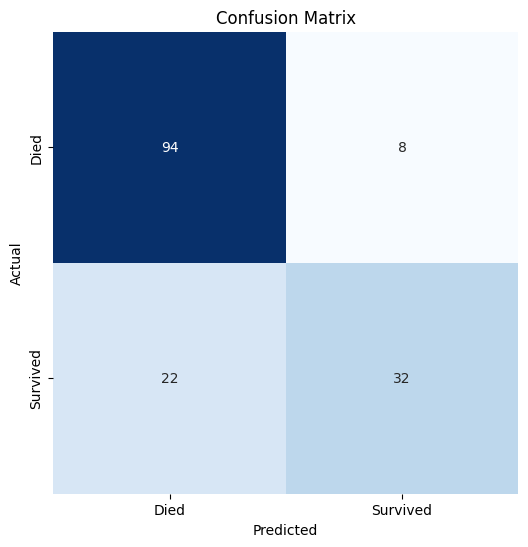

In [10]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=667)
y_pred = cross_val_predict(model_pipe, X, y, cv=cv)

report = classification_report(y, y_pred)
print(report)

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

##Fit the model with entire dataset

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/cross.png' width=600>


In [11]:
model_pipe.fit(X, y)

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('Scaling and standardize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [12]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
151,1,female,22.0,1,0,66.6000,S
152,3,male,55.5,0,0,8.0500,S
153,3,male,40.5,0,2,14.5000,S
154,3,male,NaN,0,0,7.3125,S


### Prediction of Test

In [13]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/titanic-test.csv

Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
(1,male,35,1,0,53.1,S)

In [14]:
test = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/titanic-test.csv')
test_clean = test.drop(features_to_remove, axis = 1)
test_clean

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [15]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [16]:
test_pred = model_pipe.predict(test_clean).astype(int)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
#kaggle competition export
sub = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                        'Survived' : test_pred})

sub.to_csv("solu_RF_pipe.csv", index = False)

## Prediction of single observation

In [18]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [19]:
Age= 34
Embarked = 'Q'
Fare =7.8
Parch = 0
Pclass = 3
Sex = 'female'
SibSp = 0

data = {
        "Pclass": [Pclass],
        "Sex": [Sex],
        "Age": [Age],
        "SibSp": [SibSp],
        "Parch": [Parch],
        "Fare": [Fare],
        "Embarked": [Embarked]
        }

input_df = pd.DataFrame(data)
res = model_pipe.predict(input_df).astype(int)[0]
print(res)

classes = {0:'died',
           1:'survived',
           }

y_pred = classes[res]
y_pred

1


'survived'

In [20]:
import joblib

joblib.dump(model_pipe,'titanic_pipe.pkl')

['titanic_pipe.pkl']

## Load model .pkl

In [21]:
import joblib

model_pipe = joblib.load('titanic_pipe.pkl')
print('Model loaded successfully')

Model loaded successfully


In [22]:
model_pipe

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('Scaling and standardize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [23]:
Age= 34
Embarked = 'Q'
Fare =7.8
Parch = 0
Pclass = 3
Sex = 'female'
SibSp = 0

data = {
        "Pclass": [Pclass],
        "Sex": [Sex],
        "Age": [Age],
        "SibSp": [SibSp],
        "Parch": [Parch],
        "Fare": [Fare],
        "Embarked": [Embarked]
        }
classes = {0:'died',
           1:'survived',
           }

res = model_pipe.predict(input_df).astype(int)[0]
print(res)

y_pred = classes[res]
y_pred

1


'survived'